**Vizualizacija Koronavirusa in smrtnosti virusa worldwide** (do 30.3.2020)

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# IMPORTANT : source is local, for testing use your own path

def readCorona():
    
    reader = pd.read_csv(r"..\podatki\corona_worldwide.csv")

    virus_array = reader.to_numpy()    #create array of data
    reader.head()



,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
1,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
2,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
3,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,26/03/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0


In [3]:
def drawPlot(array, country_name, search):   
    my_lines = []
    my_cases = []
    my_deaths = []
    curr_cases = 0
    curr_deaths = 0
    check = False;
    
    #print(search)
    if search == "cases" or search == "deaths" or search == "both":
        
        flipped_array = np.flip(array, 0)   #flip the input array, so the dates are in the right order

        for row in flipped_array:
            if "_" in row[6].lower():
                drz = row[6].lower().replace("_", " ")
                if drz == country_name.lower():    #name checker
                    if row[4] != 0 or check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                        #print(row)
                        check = True;
                        my_lines.append(row)
                        my_cases.append(row[4] + curr_cases)
                        my_deaths.append(row[5] + curr_deaths)
                        curr_cases += row[4]
                        curr_deaths += row[5]
            else:
                if row[6].lower() == country_name.lower():    #name checker
                    if row[4] != 0 or check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                        #print(row)
                        check = True;
                        my_lines.append(row)
                        my_cases.append(row[4] + curr_cases)
                        my_deaths.append(row[5] + curr_deaths)
                        curr_cases += row[4]
                        curr_deaths += row[5]

        if len(my_lines) == 0:
            raise ValueError("The country does not exist, try entering it in English")

        plt.figure(figsize=(20,10)) 
        
        if search == "cases":
            plt.plot(my_cases, label=my_lines[0][6]+ " - cases")
            plt.ylabel("Num. of confirmed cases")
            plt.title("Confirmed cases of Covid-19 in " + my_lines[0][6], fontdict={'fontsize': 15})
            if curr_cases < 2000:
                plt.yticks(np.arange(0, max(my_cases), 100))    #ticks set so they dont intertwine
            elif curr_cases < 50000:
                plt.yticks(np.arange(0, max(my_cases), 1000))
            else:
                plt.yticks(np.arange(0, max(my_cases), 2000))

        elif search == "deaths":
            plt.plot(my_deaths, label=my_lines[0][6]+ " - deaths")
            plt.ylabel("Num. of confirmed deaths")
            plt.title("Confirmed deaths by Covid-19 in " + my_lines[0][6], fontdict={'fontsize': 15})
            print(curr_deaths)
            if curr_deaths < 30:
                plt.yticks(np.arange(0, max(my_deaths)+1, 1))
                
        elif search == "both":
            plt.plot(my_cases, label=my_lines[0][6]+" - confirmed cases")
            plt.plot(my_deaths, label=my_lines[0][6]+" - deaths")
            plt.ylabel("Num. of confirmed cases/deaths")
            plt.title("Confirmed cases/deaths of Covid-19 in " + my_lines[0][6], fontdict={'fontsize': 15})
            if curr_cases < 2000:
                plt.yticks(np.arange(0, max(my_cases)+100, 100))
            elif curr_cases < 50000:
                plt.yticks(np.arange(0, max(my_cases)+1000, 1000))
            else:
                plt.yticks(np.arange(0, max(my_cases)+1000, 2000))
        
        plt.xlabel("Num. of days since the first confirmed case")
        plt.legend(loc="upper left")
        plt.grid(alpha=0.7)
        plt.show()
    else:
        raise ValueError("Wrong input on search, options: cases, deaths, both")

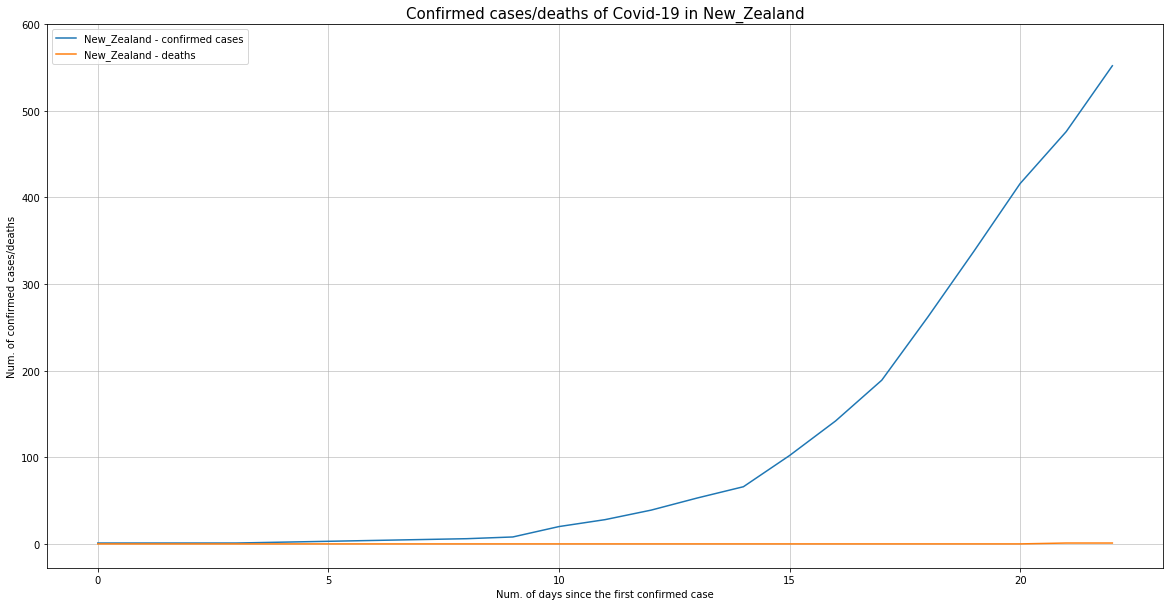

In [4]:
drawPlot(virus_array, "new zealand", "both")

In [5]:
def compare(array, first_country, second_country, search):
    first_cases = []
    first_deaths = []
    first_curr_deaths = 0
    first_curr_cases = 0
    second_cases = []
    second_deaths = []
    second_curr_deaths = 0
    second_curr_cases = 0
    first_check = False
    second_check = False
    
    flipped_array = np.flip(array, 0)
    
    for row in flipped_array:
        if "_" in row[6].lower():
            drz = row[6].lower().replace("_", " ")
            if drz == first_country.lower():    #name checker 1
                if row[4] != 0 or first_check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                    #print(row)
                    first_check = True;
                    first_cases.append(row[4] + first_curr_cases)
                    first_deaths.append(row[5] + first_curr_deaths)
                    first_curr_cases += row[4]
                    first_curr_deaths += row[5]
            elif drz == second_country.lower():    #name checker 2
                if row[4] != 0 or second_check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                    #print(row)
                    second_check = True;
                    second_cases.append(row[4] + second_curr_cases)
                    second_deaths.append(row[5] + second_curr_deaths)
                    second_curr_cases += row[4]
                    second_curr_deaths += row[5]  
        else:
            if row[6].lower() == first_country.lower():    #name checker 1
                if row[4] != 0 or first_check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                    #print(row)
                    first_check = True;
                    first_cases.append(row[4] + first_curr_cases)
                    first_deaths.append(row[5] + first_curr_deaths)
                    first_curr_cases += row[4]
                    first_curr_deaths += row[5]
            elif row[6].lower() == second_country.lower():    #name checker 2
                if row[4] != 0 or second_check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                    #print(row)
                    second_check = True;
                    second_cases.append(row[4] + second_curr_cases)
                    second_deaths.append(row[5] + second_curr_deaths)
                    second_curr_cases += row[4]
                    second_curr_deaths += row[5]      
              
       
    plt.figure(figsize=(20,10)) 
    
    if search == "cases":
        plt.title("Confirmed cases of Covid-19, comparison between two countries", fontdict={'fontsize': 15})
        plt.plot(first_cases, label = first_country.capitalize())
        plt.plot(second_cases, label = second_country.capitalize())
        
    elif search == "deaths":
        plt.title("Confirmed deaths by Covid-19, comparison between two countries", fontdict={'fontsize': 15})
        plt.plot(first_deaths, label = first_country.capitalize())
        plt.plot(second_deaths, label = second_country.capitalize())
        
    plt.legend(prop={'size': 16})
    plt.grid(alpha=0.7)
    

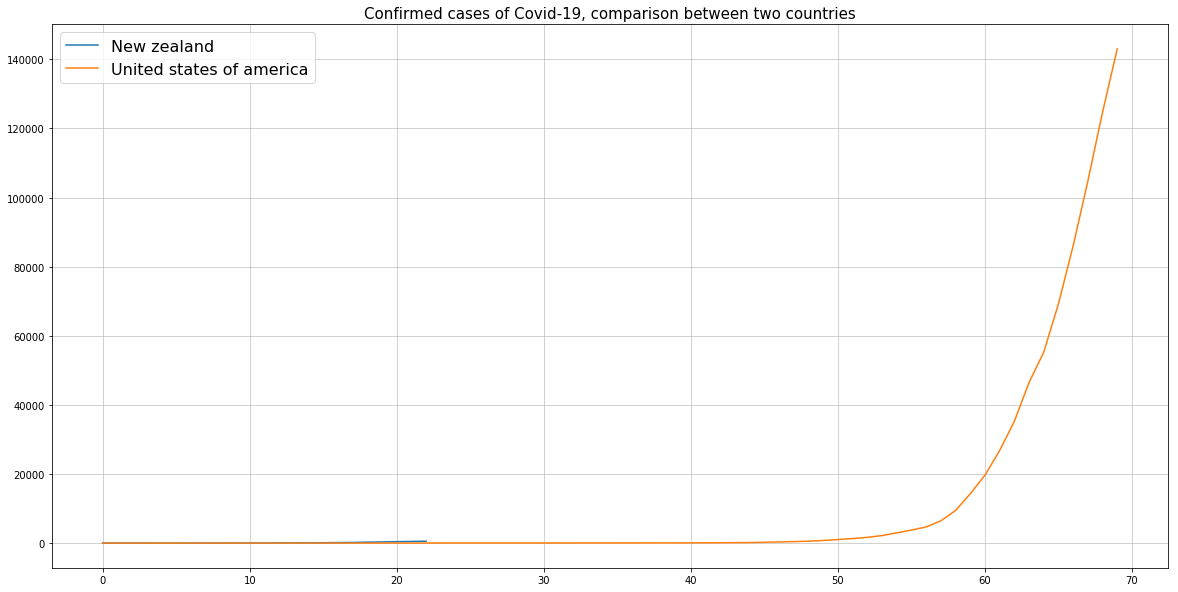

In [6]:
compare(virus_array, "new zealand", "united states of america", "cases")

In [10]:
def showCountermeasures(country):
    ex_reader = pd.read_excel("../podatki/countermeasures/" + country + ".xlsx")
    c_array = ex_reader.to_numpy()
    for line in c_array:
        print(line[0] + ": " + line[1])
showCountermeasures("slovenia")        

4.3.2020: potrjen prvi primer v Sloveniji
5.3.2020: potrjen drugi primer
6.3.2020: prepoved obiskov v domovih za starejše
7.3.2020: odredba o prepovedi zbiranja na prireditvah v javnih prostorih
10.3.2020: Prepovedano pristajanje zrakoplovov z ogroženih območij na slovenskih letališčih
11.3.2020: Vlada sprejela sklep o izvajanju kontrole vstopa na med Italijo in Slovenijo
12.3.2020: V Sloveniji bo razglašena epidemija, vrtci in šole se začasno zaprejo 
12.3.2020: Slovenija razglasila epidemijo novega koronavirusa 
13.3.2020: Od 16. ure velja odredba o prepovedi prometa zaščitnih sredstev 
15.3.2020: Vlada sprejela odlok o začasni prepovedi in omejitvah javnega prevoza potnikov v Republiki Sloveniji 
16.3.2020: Preklic prodaj premičnin 
16.3.2020: Zaprtje gostinskih lokalov
16.3.2020: Zaprtje frizerskih salonov
16.3.2020: Prepoved zračnega prometa
18.3.2020: Zaprtje mejnih prehodov med Slovenijo in Hrvaško
23.3.2020: Odpoved strokovnih izpitov za strokovne delavce v vzgoji in izobraževa

In [44]:
pd.__version__

'0.24.2'